In [1]:
# Are we able to see any patterns between co2 emissions and summer temperature over a period of 13 years? 2000-2013
#Growing up I remember the summer months of june were always the hottest, and fall weather was always cooler. Over the past several years I've noticed we've been experiencing more indian summers. Can we find data that shows this?Can we see an effect with c02 emissions? 

#create dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
from scipy.stats import linregress

#import csv files

global_emissions = "..\Resources\GlobalEmissions1751_2014.csv"
global_temp = "..\Resources\GlobalLandTemperaturesByCountry.csv"

#read csv into pandas
global_emissions = pd.read_csv(global_emissions) 
global_temp = pd.read_csv(global_temp)

#turn csv into a dataframe
global_temp_df = pd.DataFrame(global_temp)
global_co2 = pd.DataFrame(global_emissions)

#filter the info for only data on the United States
US_temp = global_temp_df.loc[global_temp_df["Country"]=="United States"]

US_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
554880,1768-09-01,15.420,2.880,United States
554881,1768-10-01,8.162,3.386,United States
554882,1768-11-01,1.591,3.783,United States
554883,1768-12-01,-2.882,4.979,United States
554884,1769-01-01,-3.952,4.856,United States


In [2]:
#Figure out what we're working with. Only print first city and see how many years of data there are.

print(US_temp)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
554880  1768-09-01              15.420                          2.880   
554881  1768-10-01               8.162                          3.386   
554882  1768-11-01               1.591                          3.783   
554883  1768-12-01              -2.882                          4.979   
554884  1769-01-01              -3.952                          4.856   
554885  1769-02-01              -2.684                          3.311   
554886  1769-03-01               1.828                          3.884   
554887  1769-04-01               8.843                          3.482   
554888  1769-05-01              15.724                          4.795   
554889  1769-06-01              20.933                          2.613   
554890  1769-07-01              22.093                          3.277   
554891  1769-08-01              20.787                          3.329   
554892  1769-09-01                 NaN             

In [3]:
print("Looking at the data above we can see that this data has country temp data starting from around 1768 to 2013")

Looking at the data above we can see that this data has country temp data starting from around 1768 to 2013


In [4]:
#Begin Datacleaning



In [5]:
#Extracting year and month from the data(data1) 
global_temp_df['Year'] = global_temp_df['dt'].str[:4]
global_temp_df['Month'] = global_temp_df['dt'].str[5:7]
global_temp_df.head()

# #create a for loop to iterate over the years
# start_year = 1750
# end_year = 2013

# # #to input the incremental years from 1849 to 2013,created a for loop  
# # Summer month is June so using the string 6 on date
# for year in range(start_year, end_year + 1): 
#     global_temp_df.loc[global_temp_df['dt'].str.contains(str(year)+ "-06"), 'Year'] = str(year)
#    # temp_df.loc[temp_df['dt'].str.contains(str(year)), 'Year'] = str(year)
    
global_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,01
3,1744-02-01,NaN,NaN,Åland,1744,02
4,1744-03-01,NaN,NaN,Åland,1744,03


In [6]:
#extracting june july august data from  data1 and name the file (june_july_august_data)
june_july_august_data=(global_temp_df[(global_temp_df['Month'] >= "6") & (global_temp_df['Month'] <= "8")])

june_july_august_data = global_temp_df.dropna(how="any")

june_july_august_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
0,1743-11-01,4.384,2.294,Åland,1743,11
5,1744-04-01,1.530,4.680,Åland,1744,04
6,1744-05-01,6.702,1.789,Åland,1744,05
7,1744-06-01,11.609,1.577,Åland,1744,06
8,1744-07-01,15.342,1.410,Åland,1744,07


In [7]:
#Find temp for only the U.S.
us_states_df = global_temp_df.loc[global_temp_df["Country"] == "United States"]

#Groupby just the year since 3 months are being joined and use an aggregate function to get the sum of all 3
us_states_df = us_states_df.groupby(["Year"]).sum()
us_states_df = us_states_df.reset_index()

#convert the temp from Celcius to Farenheight while also dividing by 3 since 3 months out of the year are taken.
#one thing that may give off values is if one temp out of the months is not recorded so it'll give a lower value than expected.
us_states_df["AverageTemperature"] =(us_states_df["AverageTemperature"]*1.8+32)/3
us_states_df = us_states_df[["AverageTemperature","Year"]]
us_states_df = us_states_df.dropna(how="any")
print(us_states_df)

     AverageTemperature  Year
0             24.041267  1768
1             60.809867  1769
2             10.666667  1770
3             10.666667  1771
4             10.666667  1772
5             10.666667  1773
6             13.552067  1774
7             79.060667  1775
8             64.192667  1776
9             70.460867  1777
10            29.969867  1778
11             9.382067  1779
12            10.666667  1780
13            25.674467  1781
14            42.613667  1782
15            10.666667  1783
16            10.666667  1784
17            10.666667  1785
18            10.666667  1786
19            10.666667  1787
20            10.666667  1788
21            10.666667  1789
22            10.666667  1790
23            10.666667  1791
24            10.666667  1792
25            10.666667  1793
26            10.666667  1794
27            10.666667  1795
28            62.036867  1796
29            33.551267  1797
..                  ...   ...
216           74.107067  1984
217       

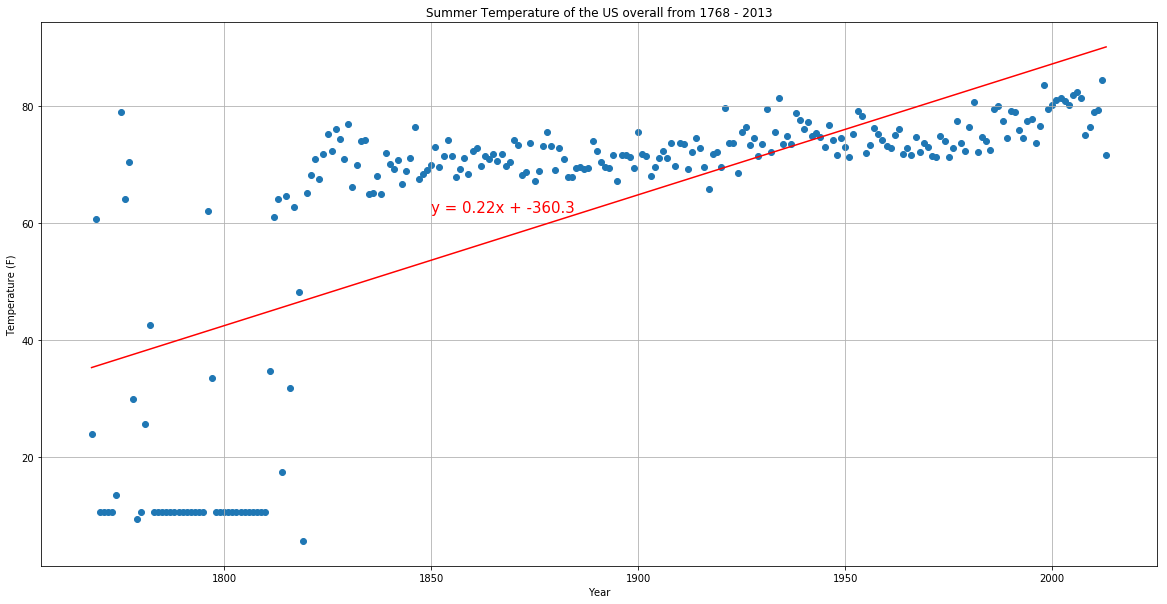

In [8]:
x_values = us_states_df["Year"].astype('int64')
y_values = us_states_df["AverageTemperature"]


fig= plt.figure(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.title("Summer Temperature of the US overall from 1768 - 2013")

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x_values,regress_values)
plt.plot(x_values, intercept + slope*x_values, 'r', label='fitted line')
plt.annotate(line_eq,(1850,62),fontsize=15,color="red")
plt.grid(True)

#fig= plt.figure(figsize=(100,20))
# plt.show()

# Save the figure
plt.savefig("output_data/overall_summer_temp.png")

In [9]:
#Now need to clean cO2 data more in order to merge together
global_co2.columns

Index(['Nation', 'Year',
       'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)',
       'Emissions from solid fuel consumption',
       'Emissions from liquid fuel consumption',
       'Emissions from gas fuel consumption',
       'Emissions from cement production', 'Emissions from gas flaring',
       'Per capita CO2 emissions (metric tons of carbon)',
       'Emissions from bunker fuels (not included in the totals)'],
      dtype='object')

In [10]:
co2_data = global_co2[["Nation", "Year","Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)"]]
co2_data = co2_data.rename(columns ={"Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)": "Total CO2 emisions (thousand metric tons of C)"}) 
co2_data = co2_data.dropna(how="any")
co2_data.head()

,Nation,Year,Total CO2 emisions (thousand metric tons of C)
3,AFGHANISTAN,1949.0,4.0
4,AFGHANISTAN,1950.0,23.0
5,AFGHANISTAN,1951.0,25.0
6,AFGHANISTAN,1952.0,25.0
7,AFGHANISTAN,1953.0,29.0


In [11]:
US_co2 = co2_data.loc[co2_data["Nation"]=="UNITED STATES OF AMERICA"]

#Year is a floatso need to convert to int in order to merge with other data set
US_co2["Year"] = US_co2["Year"].astype('int64')
US_co2.head()

C:\Users\Mikey\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Nation,Year,Total CO2 emisions (thousand metric tons of C)
16200,UNITED STATES OF AMERICA,1800,69.0
16201,UNITED STATES OF AMERICA,1801,73.0
16202,UNITED STATES OF AMERICA,1802,79.0
16203,UNITED STATES OF AMERICA,1803,81.0
16204,UNITED STATES OF AMERICA,1804,91.0


In [12]:
#temp Month of June U.S.
#plt.scatter(us_states_df["Year"],us_states_df["AverageTemperature"])
us_states_df.head()

,AverageTemperature,Year
0,24.041267,1768
1,60.809867,1769
2,10.666667,1770
3,10.666667,1771
4,10.666667,1772


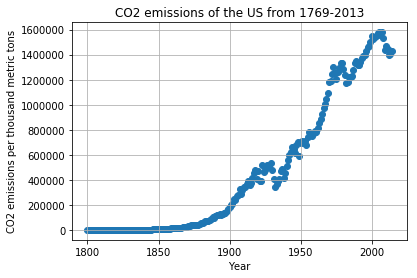

In [13]:
#CO2 emissions

plt.xlabel("Year")
plt.ylabel("CO2 emissions per thousand metric tons")
plt.title("CO2 emissions of the US from 1769-2013")
plt.grid(True)

plt.scatter(US_co2["Year"],US_co2["Total CO2 emisions (thousand metric tons of C)"])

# Save the figure
plt.savefig("output_data/overall_co2_1769-2013.png")

co2_group_mean.merge(us_states_df,on=["State","Year"])